In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/processed/filtered_complaints.csv')
df.shape

(444079, 19)

In [ ]:

filtered_count = len(df)

product_counts = df['Product'].value_counts()
top_product = product_counts.idxmax()
top_product_count = product_counts.max()

df['word_count'] = df['cleaned_narrative'].apply(lambda x: len(str(x).split()))
avg_word_count = df['word_count'].mean()

print(f"--- Task 1 Stats ---")
print(f"Total Filtered Complaints: {filtered_count}")
print(f"Top Complaint Category: {top_product} ({top_product_count} records)")
print(f"Average Narrative Length: {avg_word_count:.2f} words")

--- Task 1 Stats ---
Total Filtered Complaints: 444079
Top Complaint Category: Checking or savings account (140319 records)
Average Narrative Length: 198.76 words


In [ ]:
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
db = Chroma(persist_directory="../vector_store/chroma_db", embedding_function=embeddings)

# Get the total number of chunks
total_chunks = len(db.get()['ids'])

print(f"--- Task 2 Stats ---")
print(f"Total Semantic Chunks Indexed: {total_chunks}")

C:\Users\a_kas\AppData\Local\Temp\ipykernel_18132\2821252952.py:5: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the `langchain-huggingface package and should be used instead. To use it run `pip install -U `langchain-huggingface` and import as `from `langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
c:\Users\a_kas\audit-rag-complaint-analyzer\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\a_kas\AppData\Local\Temp\ipykernel_18132\2821252952.py:8: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the `langchain

--- Task 2 Stats ---
Total Semantic Chunks Indexed: 5461


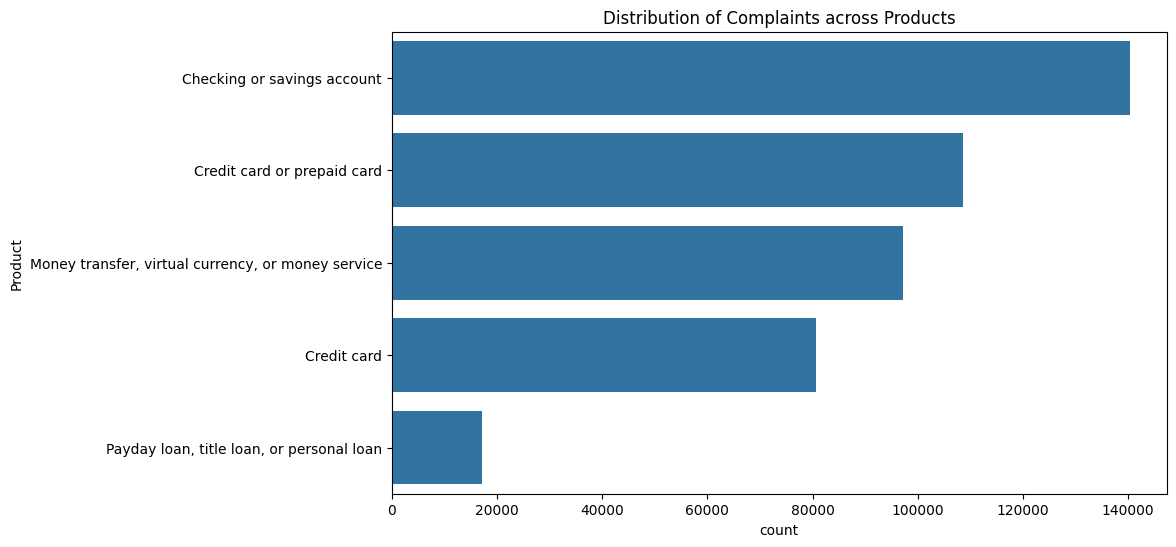

In [2]:
# Visualization 1: Distribution of Products
plt.figure(figsize=(10, 6))
sns.countplot(y='Product', data=df, order=df['Product'].value_counts().index)
plt.title('Distribution of Complaints across Products')
plt.show()


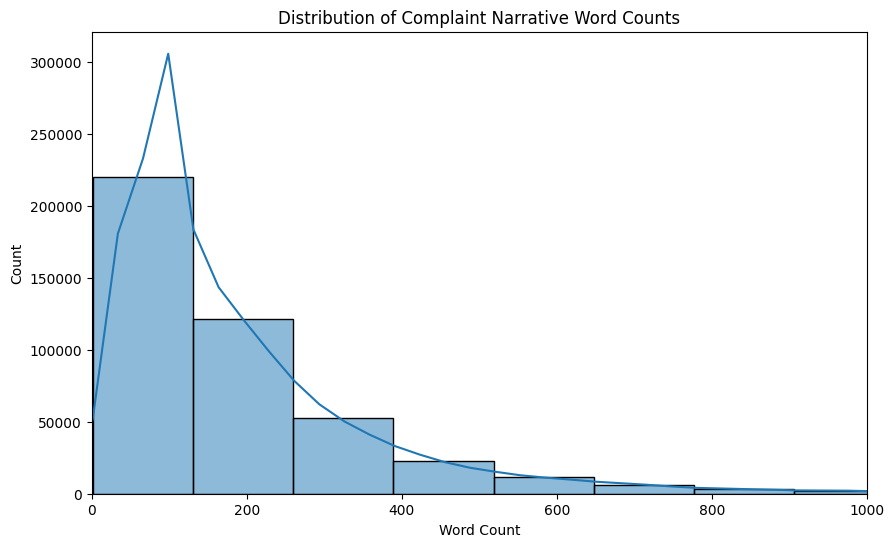

Total Complaints: 444079
Average Narrative Length: 198.76 words


In [3]:
# Visualization 2: Narrative Length Analysis
df['narrative_length'] = df['cleaned_narrative'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.histplot(df['narrative_length'], bins=50, kde=True)
plt.title('Distribution of Complaint Narrative Word Counts')
plt.xlabel('Word Count')
plt.xlim(0, 1000) # Clipping for better visibility
plt.show()

# Print stats for the report
print(f"Total Complaints: {len(df)}")
print(f"Average Narrative Length: {df['narrative_length'].mean():.2f} words")